<a href="https://colab.research.google.com/github/shubhm253/AI/blob/master/sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from __future__ import print_function, division

In [0]:
from future.utils import iteritems

In [0]:
from builtins import range

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
from wordcloud import WordCloud

In [0]:
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [0]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [0]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [0]:
df= df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [0]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ['labels','data']

In [0]:
df.head(5)

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df["b_labels"]=df["labels"].map({'ham':0,'spam':1})
y=df["b_labels"].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
countvectorizer = CountVectorizer(decode_error='ignore')

In [0]:
x=countvectorizer.fit_transform(df['data'])

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [0]:
model = MultinomialNB()
model.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
model.score(xtrain,ytrain)

0.9930350924189659

In [0]:
model.score(xtest,ytest)

0.9836867862969005

In [0]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg=msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600,height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

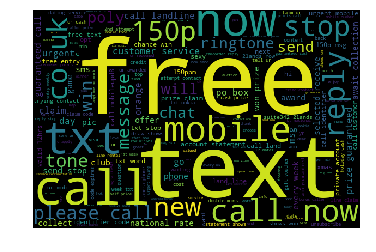

In [0]:
visualize('spam')

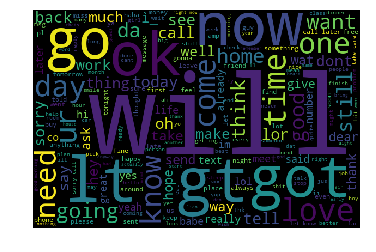

In [0]:
visualize('ham')

In [0]:
df['predictions'] = model.predict(x)

In [0]:
df

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,0
6,ham,Even my brother is not like to speak with me. ...,0,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,0
8,spam,WINNER!! As a valued network customer you have...,1,1
9,spam,Had your mobile 11 months or more? U R entitle...,1,1
